# data stats

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path

In [5]:
def read_stats(path):
    with path.open('r') as f:
        lines = [l.strip().split('\t') for l in f]

    assert lines[0] == ["Lang", "Sents", "Source", "English"]  # header
    assert len(lines[-2]) == 1 and lines[-2][0] == ''  # empty line before total
    assert lines[-1][0] == 'Total' # total
    recs = lines[1:-2]
    recs = {rec[0].upper(): [int(x) for x in rec[1:]] for rec in recs}
    return recs


stats_file  = Path('tabs/train.good.dedup.notest.ascitgt.tok.stats.tsv')
lang_stat = read_stats(stats_file)

In [35]:
def simple_plot(names, series, legends, title='', save=None, figsize=(20, 4), legend=True, ylims=None):
    assert len(series) == len(legends)
    fig, ax = plt.subplots(figsize=figsize)
    sers = []
    mn, mx = float('inf'), float('-inf')
    markers = ['s', '^', 'o', 'v', 'o', 'p', '.']
    for ser, leg, mark in zip(series, legends, markers):
        sers.append(ax.plot(names, ser, mark, label=leg)[0])
        mn, mx = min(mn, min(ser)), max(mx, max(ser))
    
    if ylims:
        plt.ylim(*ylims)
    else:
        plt.ylim(mn/10, mx*10)

    if legend:
        plt.legend(sers, [s.get_label() for s in sers], fontsize=16)
    plt.yscale('log')
    plt.xticks(rotation=90) # , fontsize=10
    plt.tight_layout()
    plt.yticks(fontsize=18)
    plt.margins(x=0.008)
    if title:
        plt.title(title)
    ax.grid(axis='y')
    if save:
        print(f'saving to {save}')
        plt.savefig(save) #bbox_inches='tight'
    plt.show()

def plot_lang_stats(stats, chunk_size=100, max_stats=500, saveas=None, figsize=(20, 4), legend=True, ylims=None):
    names_all = list(sorted(stats.keys(), reverse=True, key=lambda l:lang_stat[l][2]))
    for start in range(0, min(max_stats, len(stats)), chunk_size):
        names = names_all[start:start+chunk_size]
        sents = [stats[n][0] for n in names]
        src_toks = [stats[n][1] for n in names]
        eng_toks = [stats[n][2] for n in names]
        save_chunk = None
        if saveas:
            assert len(saveas.split('.')) == 2 # only one dot allowed
            save_chunk = saveas.replace('.', f'-{start+1}.')
        #sns.set(font="Serif", style='white',font_scale=1.1)
        simple_plot(names, series=[src_toks, eng_toks, sents], 
                    legends=['Source Tokens', 'English Tokens', 'Sentences'],
                    title=f'Languages {start}-{start+len(names)}',
                    legend=legend, save=save_chunk, figsize=figsize,
                   ylims=ylims)

saving to charts/lang-stats-1-100.pdf


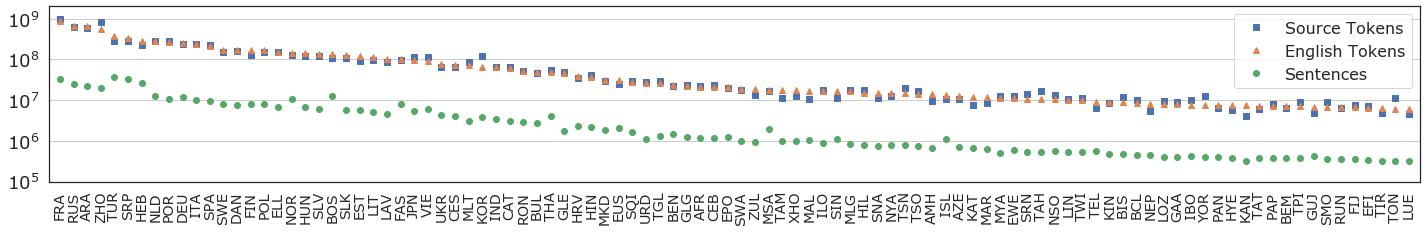

saving to charts/lang-stats-101-200.pdf


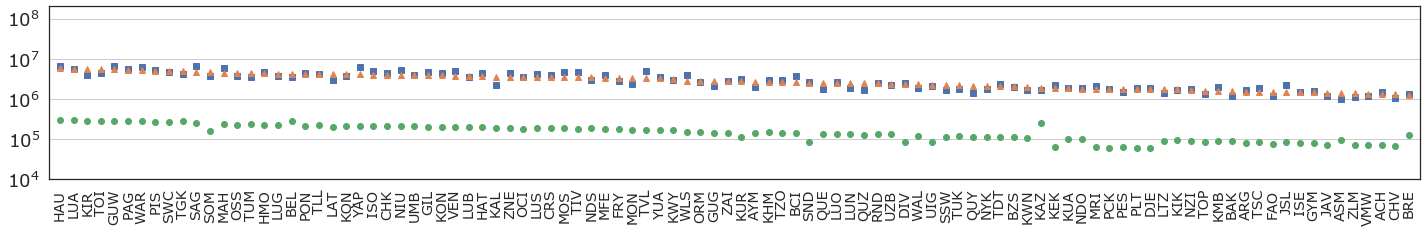

saving to charts/lang-stats-201-300.pdf


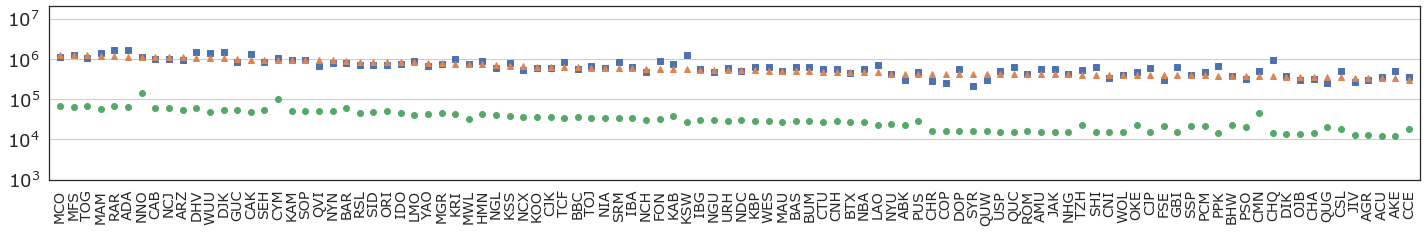

saving to charts/lang-stats-301-400.pdf


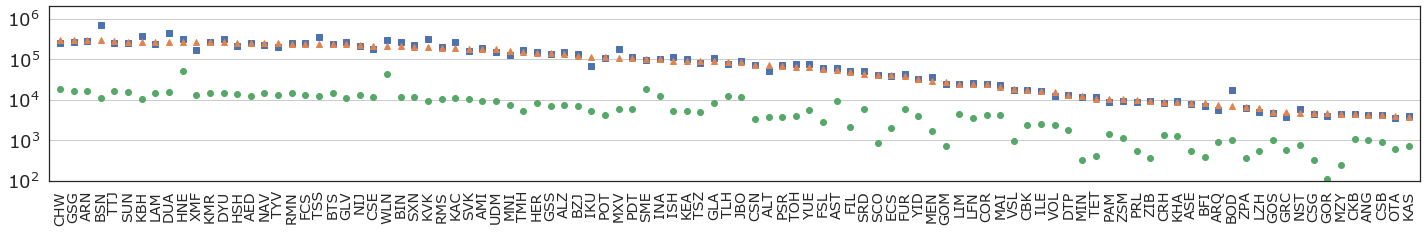

saving to charts/lang-stats-401-500.pdf


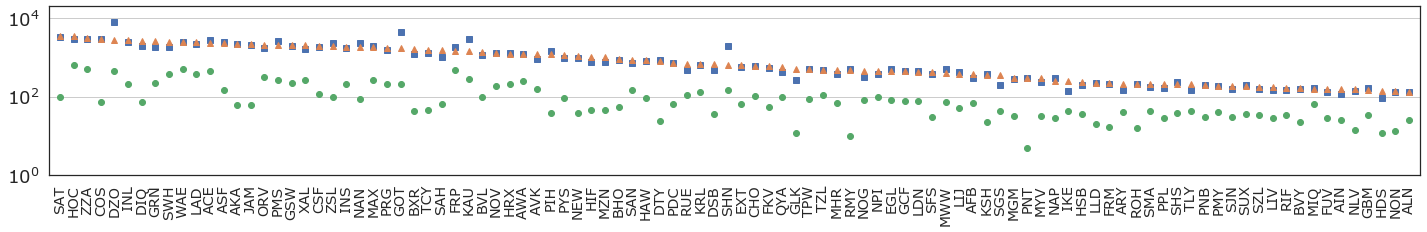

In [37]:
chunk_size=100
limits = [
    (10**5, 2 * 10**9),
    (10**4, 2 * 10**8),    
    (10**3, 2 * 10**7),    
    (10**2, 2 * 10**6),        
    (10**0, 2 * 10**4),            
]
for start, ylims in zip(range(0, min(500, len(lang_stat)), chunk_size), limits):
    names = list(sorted(lang_stat.keys(), reverse=True, 
                        key=lambda l:lang_stat[l][2]))[start:start+chunk_size]
    sents = [lang_stat[n][0] for n in names]
    src_toks = [lang_stat[n][1] for n in names]
    eng_toks = [lang_stat[n][2] for n in names]

    #sns.set(font="Times New Roman", style='white',font_scale=1.2)
    #sns.set(font="Times", style='white',font_scale=1.3)
    sns.set(font="Verdana", style='white',font_scale=1.3)
    #sns.set(font="Bell Centennial", style='white',font_scale=1.31)
    
    # sns.set(font="Times New Roman")
    legend = start == 0
    simple_plot(names, series=[src_toks, eng_toks, sents], 
                legends=['Source Tokens', 'English Tokens', 'Sentences'],
                #title=f'Languages {start+1}-{start+len(names)}',
                save=f'charts/lang-stats-{start+1}-{start+len(names)}.pdf',
                legend = legend, figsize=(20, 3.5), ylims=ylims)


[473791770, 9001780032, 9072887211]


## Generate Asciidoc Table


In [34]:
header = ["Lang", "Sents", "Source", "English"]
list(lang_stat.items())[:10]
top_500 = list(sorted(lang_stat.items(), key=lambda x:x[1][-1], reverse=True))[:500]

In [36]:

file='data-stats.adoc'
header = """|===
|ISO 639-3 |Name |Sentences | SourceTokens | EnglishTokens

"""
tot = [ 0, 0, 0 ]
with open(file, mode='w') as out:
    out.write(header)
    for i, (code, (sents, src, eng)) in enumerate(top_500):
        tot[0] += sents
        tot[1] += src
        tot[2] += eng
        name = code_to_name(code)
        line = f"|{code} |{name} | {sents:,} | {src:,} | {eng:,}\n"
        out.write(line)
    out.write("")
    out.write(f"|Total | |{tot[0]:,} |{tot[1]:,} |{tot[2]:,}\n")
    out.write("|===")


In [20]:
from  mtdata.iso import iso3_code
from mtdata.iso.iso639_3 import code_to_name


---- 

In [16]:
matplotlib.font_manager._rebuild()

In [20]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font} {fontu}</p>".format(font=fontname, fontu=fontname.upper())

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))